## Deep Learning Exercise

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

read the data `emnist-letters.csv`

In [2]:
data = pd.read_csv('emnist-letters.csv')

what is the shape of the data? why is it 785 and not 784?

In [3]:
print(f"The data shape:  {data.shape}")

The data shape:  (14799, 785)


split the data into X and y

In [4]:
y = np.array(data.iloc[:,0].values)
X = np.array(data.iloc[:,1:].values)

show the 12 first images in the data. for each image set the title to be the label of the image.

NOTE: the labels are in numbers 1-> a, 2->b ... 26->z.
we want to see the letters, not the numbers. think how to do it. you can use the dict `int_to_letter` which is {1: 'a', 2: 'b', 3: 'c'...26: 'z'}

In [5]:
int_to_letter = {i: l for i,l in zip(range(1,27), 'abcdefghijklmnopqrstuvwxyz')}

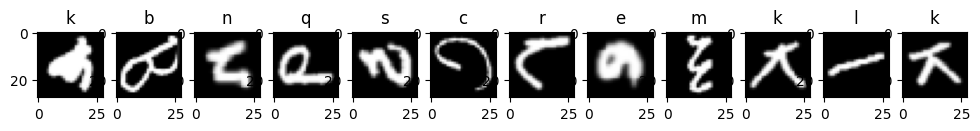

In [6]:
fig, axes = plt.subplots(1, 12,figsize=(12,1))

for i in range(12):
    img = X[i].reshape(28,28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(int_to_letter[y[i]])

as you can see, the images are rotated. you can use the following code for rotating the image:
```
    img = X[i].reshape(28,28)
    flipped_image = np.fliplr(img)
    rotated_image = np.rot90(flipped_image)
```
now you can do `axes[i].imshow(rotated_image)`

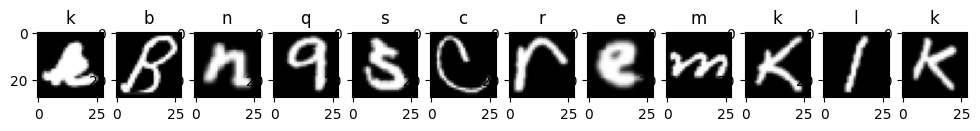

In [7]:
fig, axes = plt.subplots(1, 12,figsize=(12,1))

for i in range(12):
    img = X[i].reshape(28,28)
    flipped_image = np.fliplr(img)
    rotated_image = np.rot90(flipped_image)
    axes[i].imshow(rotated_image, cmap='gray')
    axes[i].set_title(int_to_letter[y[i]])

split the data into train and test (test_size = 0.2)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state = 42)

Normalize pixel values to the range [0, 1] by dividing by 255.

In [9]:
x_train = x_train / 255
x_test = x_test/ 255

One-hot encode the target labels for categorical classification.

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 26)
y_test = tf.keras.utils.to_categorical(y_test, 26)

define model with the following layers:
* input layer in shape 784
* dense layer in shape 128 and then relu activation function
* dense layer in shape 64 and then relu activation function
* output layer: dense layer in shape 26 which activation function'll be for this layer?

show the summary of the model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= 784),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 27 classes for letters
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 26)                1690      
                                                                 
Total params: 110,426
Trainable params: 110,426
Non-trainable params: 0
_________________________________________________________________


compile the model use Adam optimizer: `keras.optimizers.Adam()`

In [12]:
from tensorflow import keras
model.compile(optimizer=keras.optimizers.Adam(),
             loss="categorical_crossentropy",
             metrics=(["accuracy"]))

train the model (with fit), with 30 epochs

In [13]:
history = model.fit(x_train, y_train, 
                    epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
370/370 [==============================] - 5s 8ms/step - loss: 1.3017 - accuracy: 0.6137 - val_loss: 0.8222 - val_accuracy: 0.7429
Epoch 2/30
370/370 [==============================] - 3s 7ms/step - loss: 0.7370 - accuracy: 0.7708 - val_loss: 0.6639 - val_accuracy: 0.7936
Epoch 3/30
370/370 [==============================] - 2s 6ms/step - loss: 0.5772 - accuracy: 0.8196 - val_loss: 0.6002 - val_accuracy: 0.8105
Epoch 4/30
370/370 [==============================] - 2s 6ms/step - loss: 0.4826 - accuracy: 0.8451 - val_loss: 0.5721 - val_accuracy: 0.8122
Epoch 5/30
370/370 [==============================] - 2s 6ms/step - loss: 0.4099 - accuracy: 0.8670 - val_loss: 0.5302 - val_accuracy: 0.8321
Epoch 6/30
370/370 [==============================] - 2s 6ms/step - loss: 0.3517 - accuracy: 0.8824 - val_loss: 0.5463 - val_accuracy: 0.8294
Epoch 7/30
370/370 [==============================] - 2s 6ms/step - loss: 0.3046 - accuracy: 0.8996 - val_loss: 0.5573 - val_accuracy: 0.8213
Epoch 

what is the train accuracy? what is the test accuracy?
It seems that there is overfitting.

lets try to add dropout.

the architecture now:
* input layer in shape 784
* dense layer in shape 128 and then relu activation function
* dropout with keep_prob = 0.2 
* dense layer in shape 64 and then relu activation function
* output layer: dense layer in shape 26 which activation function'll be for this layer?

the syntax of adding dropout layer:
```
from tensorflow.keras.layers import Dropout
model.add(Dropout(keep_prob))
```
(replace `keep_prob` with the desired value)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= 784),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax') 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 26)                1690      
                                                                 
Total params: 110,426
Trainable params: 110,426
Non-trainable params: 0
_________________________________________________________________


compile the model

In [15]:
from tensorflow import keras
model.compile(optimizer=keras.optimizers.Adam(),
             loss="categorical_crossentropy",
             metrics=(["accuracy"]))

train the model

In [16]:
history = model.fit(x_train, y_train, 
                    epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
370/370 [==============================] - 5s 8ms/step - loss: 1.4593 - accuracy: 0.5519 - val_loss: 0.8576 - val_accuracy: 0.7314
Epoch 2/30
370/370 [==============================] - 2s 6ms/step - loss: 0.8576 - accuracy: 0.7341 - val_loss: 0.6894 - val_accuracy: 0.7797
Epoch 3/30
370/370 [==============================] - 2s 6ms/step - loss: 0.7147 - accuracy: 0.7738 - val_loss: 0.6234 - val_accuracy: 0.8024
Epoch 4/30
370/370 [==============================] - 2s 6ms/step - loss: 0.6199 - accuracy: 0.8026 - val_loss: 0.6118 - val_accuracy: 0.7976
Epoch 5/30
370/370 [==============================] - 2s 6ms/step - loss: 0.5464 - accuracy: 0.8197 - val_loss: 0.5315 - val_accuracy: 0.8257
Epoch 6/30
370/370 [==============================] - 2s 6ms/step - loss: 0.5045 - accuracy: 0.8322 - val_loss: 0.5669 - val_accuracy: 0.8155
Epoch 7/30
370/370 [==============================] - 2s 6ms/step - loss: 0.4646 - accuracy: 0.8418 - val_loss: 0.5144 - val_accuracy: 0.8321
Epoch 

Is it better now? Is the difference between the accuracy and the val accuracy smaller?

what else can we do to improve it?